<a href="https://colab.research.google.com/github/divyansh1122/ml-basics/blob/main/DistilBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ktrain

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [10]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [13]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med', 'rec.sport.baseball']

In [14]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [17]:
test = fetch_20newsgroups(
    subset = 'test',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [19]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [21]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

In [22]:
X_train = train.data
y_train = train.target

X_test = test.data
y_test = test.target

In [24]:
len(X_train), len(X_test)

(2854, 1899)

In [ ]:
X_test

In [21]:
# Build ML model with Transformer

In [26]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512, class_names=categories)

In [27]:
train_data = trans.preprocess_train(X_train, y_train)

test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 291
	95percentile : 820
	99percentile : 1757


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 323
	95percentile : 894
	99percentile : 2394


In [28]:
model = trans.get_classifier()

In [29]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
178/178 [==============================] - 106s 535ms/step - loss: 1.6078 - accuracy: 0.2043
Epoch 2/10
178/178 [==============================] - 95s 537ms/step - loss: 1.5284 - accuracy: 0.4984
Epoch 3/10
178/178 [==============================] - 95s 535ms/step - loss: 0.6170 - accuracy: 0.8947
Epoch 4/10
178/178 [==============================] - 95s 534ms/step - loss: 0.1631 - accuracy: 0.9592
Epoch 5/10
178/178 [==============================] - 81s 453ms/step - loss: 0.6238 - accuracy: 0.7607


done.
Visually inspect loss plot and select learning rate associated with falling loss


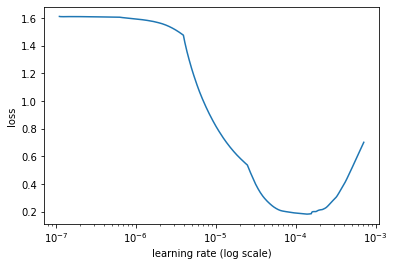

In [30]:
# To find best learning rate

learner.lr_find(show_plot=True, max_epochs=10)

In [31]:
learner.fit_onecycle(lr=1e-4, epochs=1)



begin training using onecycle policy with max lr of 0.0001...
179/179 [==============================] - 125s 653ms/step - loss: 0.9077 - accuracy: 0.6975 - val_loss: 0.2135 - val_accuracy: 0.9373


In [33]:
learner.validate(class_names=categories)

                        precision    recall  f1-score   support

           alt.atheism       0.81      0.92      0.87       319
soc.religion.christian       0.94      0.98      0.96       389
         comp.graphics       0.99      0.97      0.98       397
               sci.med       0.99      0.91      0.95       396
    rec.sport.baseball       0.95      0.90      0.92       398

              accuracy                           0.94      1899
             macro avg       0.94      0.94      0.94      1899
          weighted avg       0.94      0.94      0.94      1899



array([[295,   3,   2,   4,  15],
       [  9, 380,   0,   0,   0],
       [  3,   5, 387,   1,   1],
       [ 18,  14,   2, 361,   1],
       [ 37,   3,   1,   0, 357]])

In [34]:
# View the wrong predictions

learner.view_top_losses(n=5, preproc=trans)

----------
id:562 | loss:5.88 | true:rec.sport.baseball | pred:soc.religion.christian)

----------
id:311 | loss:5.34 | true:sci.med | pred:alt.atheism)

----------
id:787 | loss:5.3 | true:comp.graphics | pred:soc.religion.christian)

----------
id:994 | loss:5.19 | true:alt.atheism | pred:soc.religion.christian)

----------
id:374 | loss:5.17 | true:rec.sport.baseball | pred:soc.religion.christian)



In [36]:
X_test[311]

"From: turpin@cs.utexas.edu (Russell Turpin)\nSubject: Meaning of atheism, agnosticism  (was: Krillean Photography)\nOrganization: CS Dept, University of Texas at Austin\nLines: 23\nNNTP-Posting-Host: saltillo.cs.utexas.edu\n\n-*----\nSci.med removed from followups.  (And I do not read any of the\nother newsgroups.)\n\n-*----\nIn article <1993Apr30.170233.12510@rosevax.rosemount.com> grante@aquarius.rosemount.com (Grant Edwards) writes:\n> As a self-proclaimed atheist my position is that I _believe_ that \n> there is no god.  I don't claim to have any proof.  I interpret\n> the agnostic position as having no beliefs about god's existence.\n\nThat's fine.  These words have multiple meanings.\n\nAs a self-proclaimed atheist, I believe that *some* conceptions\nof god are inconsistent or in conflict with fact, and I lack\nbelief in other conceptions of god merely because there is no\nreason for me to believe in these.  I usually use the word\nagnostic to mean someone who believes that the 

# Predict on new data

In [37]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [38]:
x = "Jesus Christ is the central figure of Christianity."

In [39]:
predictor.predict(x)

'rec.sport.baseball'